
# Variational Auto-Encoders
---



In [ ]:
!pip install torch torchvision matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data import dataloader
import matplotlib.pyplot as plt


In [ ]:
# Defining the  Encoder.

class Encoder(nn.Module):
  def __init__(self,input_dim, hidden_dim, latent_dim):
    """"
    Initialize the Encoder class

    Args:

    input_dim: dimension of the input data
    hidden_dim: dimension of the hidden layer
    latent_dim: dimension of the latent space

    """

    super(Encoder,self).__init__()

    # Define the fully connected Layers
    self.fc1 = nn.Linear(input_dim,hidden_dim)
    self.fc_mu = nn.Linear(hidden_dim,latent_dim)
    self.fc_logvar = nn.Linear(hidden_dim,latent_dim)


  # Definr the forward pass through the encoder
  def forward(self, X):

    """
    Define the forward pass

    Args:

    X: input data

    Returns:

    mu: mean of the latent space
    Logvar: log of the varia=ence of the latent space.

    """

    # Apply ReLU function to the hidden layer

    h = torch.relu(self.fc1(X))

    # Calculate mu and Logvar
    mu = torch.relu(self.fc_mu(h))
    logvar = torch.relu(self.fc_logvar(h))

    return mu, logvar




In [ ]:
# Define the decoder class, which maps latent space.

class Decoder(nn.Module):
  def __init__(self, latent_dim, hidden_dim, output_dim):
    """
    Initialize the decoder class

    Args:
    latent_dim: dimension of the latent space
    hidden_dim: dimension of the hidden layer
    output_dim: dimension of the output data

    """

    super(Decoder, self).__init__()

    # Define the fully connected layer for the decoder

    self.fc1 = nn.Linear(latent_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, output_dim)

  # Define the forward pass through the decoder

  def forward(self, z):
    """
    Define forward pass through the decoder

    Args:
    z: the latent space data.

    Returns x_hat:
    the reconstructed output data.
    """

    # Apply relu activation to the hidden layer

    h = torch.relu(self.fc1(z))

    # Apply sigmoid to the output layer

    x_hat = torch.sigmoid(self.fc2(h))

    return x_hat


In [ ]:
# Define the VAE

class VAE(nn.Module):
  def __init__(self, input_dim, hidden_dim, latent_dim):
    """
    Initialize the VAE class

    Args:
    input_dim: dimension of the input data
    hidden_dim: dimension of the hidden layer
    latent_dim: dimension of the latent space

    """
    super(VAE,self).__init__()

    # Define Encoder and Decoder instances
    self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
    self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

  def forward(self,X):
    """
    Define the forward pass through the VAE

    Args:
    X: input data

    Returns:
    x_hat: reconstructed output data
    z: latent space data
    mu: mean of the latent space
    Logvar: log varience of the latent space.
    """

    # Encode input to the latent space
    mu, logvar = self.encoder(X)

    # Sample from latent space using reparameterization trick
    std = torch.exp(0.5*logvar)
    eps = torch.rand_like(std)

    z = mu + eps*std

    # Decode latent space to output
    x_hat = self.decoder(z)

    return x_hat, mu, logvar



In [ ]:
def loss_function(X, x_hat, mu, logvar):
  """
  Define the loss function

  Args:
  x: input data
  x_hat: reconstructed data
  mu: mean of the latent distribution
  logvar: Log of the varience of the latent space

  Returns:
  loss: the VAE loss
  """

  # Claculate binary cross entropy loss
  BCE = nn.functional.binary_cross_entropy(x_hat, X, reduction='sum')

  #calculate KL divergence loss
  KLD = -0.5*torch.sum(1+logvar - mu.pow(2)-logvar.exp())

  return BCE+KLD

In [ ]:
# Defining the dimensions

input_dim = 784
hidden_dim = 400
latent_dim = 20
lr = 1e-3
batch_size = 128
epochs = 10

# Data loader
transform  = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = dataloader.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# model, optimizer
vae = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
  train_loss=0
  for x, _ in train_loader:
    x = x.view(-1, input_dim)
    optimizer.zero_grad()
    x_hat, mu, logvar = vae(x)
    loss = loss_function(x, x_hat, mu, logvar)
    loss.backward()
    train_loss += loss.item()
    optimizer.step()

  print(f"Epoch {epoch+1}, Loss:{train_loss/len(train_loader.dataset)}")

Epoch 1, Loss:160.2990142903646
Epoch 2, Loss:126.9612905436198
Epoch 3, Loss:121.56392386067708
Epoch 4, Loss:118.15051604817708
Epoch 5, Loss:115.74727210286459
Epoch 6, Loss:114.00889308268229
Epoch 7, Loss:112.66804793294271
Epoch 8, Loss:111.66413876953125
Epoch 9, Loss:110.9789473795573
Epoch 10, Loss:110.39882068684896


# Testing and Evaluation

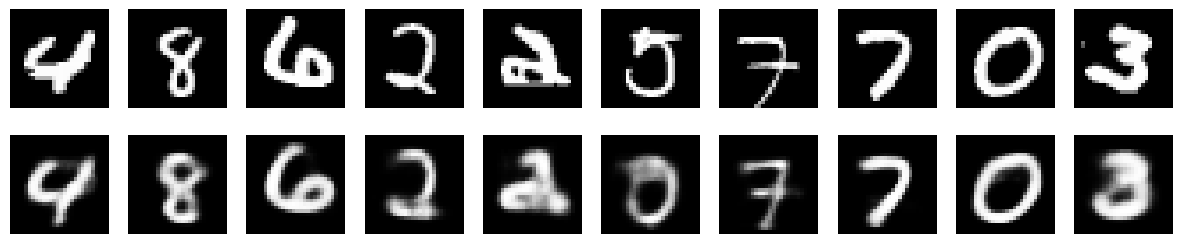

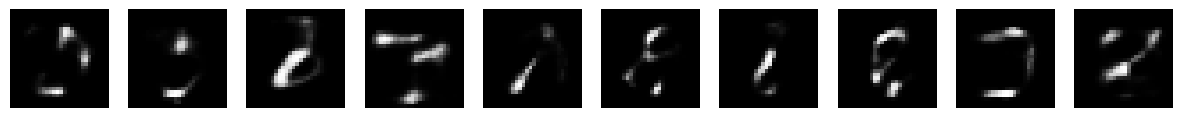

In [ ]:
vae.eval()

# Reconstructing of the new data
with torch.no_grad():
  x, _ = next(iter(train_loader)) #(-1,784)

  x = x.view(-1, input_dim)
  x_hat, _, _ = vae(x)
  x = x.view(-1,28,28)
  x_hat = x_hat.view(-1,28,28) #(28,28)

  fig, axs = plt.subplots(2,10, figsize=(15, 3))

  for i in range(10):
    axs[0,i].imshow(x[i].cpu().numpy(),cmap='gray')
    axs[1,i].imshow(x_hat[i].cpu().numpy(),cmap='gray')
    axs[0,i].axis('off')
    axs[1,i].axis('off')

  plt.show()


# Visualizing new Generated data
with torch.no_grad():
  z = torch.randn(10, latent_dim)

  sample = vae.decoder(z)
  sample = sample.view(-1,28,28)

  fig, axs = plt.subplots(1,10, figsize=(15,3))

  for i in range(10):
     axs[i].imshow(sample[i].cpu().numpy(),cmap='gray')
     axs[i].axis('off')
  plt.show()
